[Link](http://www.new-npac.org/projects/cdroms/cewes-1998-05/foilsets/cps615ni95/node54.html)

### The Metropolis Procedure (Maximize)

The method starts with a point $x_i$ which can choose at random or with some prejudice. We now wish to generate the next point $x_j$.

* Choose $x_t$ uniformly in a neighborhood of $x_i$ , i.e., $-\Delta x + x_i < x_t < \Delta x + x_i $.

* Then examine $f(x_i)$ and $f(x_t)$

* if $f(x_t)$ > $f(x_i)$, accept $x_t$ and put $x_{i+1}=x_t$ 

* if $f(x_t)$ < $f(x_i)$, generate a new random number $r$ uniformly in $[0,1]$.

    * if $r<f(x_t)/f(x_i)$, set $x_{i+1}=x_t$ 
    * if $r>f(x_t)/f(x_i)$, set $x_{i+1}=x_i$ 

$x_{i+1}$ is next random point (note it may be identical to $x_i$). Eventually, this produces a set of points distributed ``according to $f(x)$''. 

# 1 dim Marakov chain

The state space of this Markov chain is E :=   and the non-null terms of its transition matrix are pi,i+1 = p , pi,i−1 = 1 − p, where p ∈ (0, 1). Since this chain is irreducible, it suffices to elucidate the nature (recurrent or transient) of any one of its states, say, 0. We have p00(2n + 1) = 0 and

In [15]:
%%time
import random
p = 0.5
N = int(10E6)

C = 0
for i in range(N):
    dice = random.random()
    if dice < p:
        C +=1
    else:
        C -=1

print(C)

4636
CPU times: user 2.43 s, sys: 4.15 ms, total: 2.43 s
Wall time: 2.43 s


### A General Simulated Annealing Algorithm

- Step (0): Initialize the iteration count k = 0 and select the temperature Cp = Cpo to be sufficiently high such that the probability of accepting any solution is close to 1.

- Step (1): Set an initial feasible solution = current solution $X_i$ with corresponding objective function value $E_i$.

- Step(2): If the equilibrium condition is satisfied, go to Step (5); else execute Steps (3) and (4).

- Step (3): Generate a trial solution $X_j$, as a neighbor to $X_i$. Let $E_j$ be the corresponding objective function value.

- Step (4): Acceptance test: If $E_j \lt E_i$: accept the trial solution, set $X_i = X_j$, and go to Step (2). Otherwise: if $\exp[(E_i- E_j)/Cp] \gt U(0,1)$ set $X_i = X_j$ and go to Step (2); else go to Step (2).

- Step (5) If the stopping criterion is satisfied then stop; else decrease the temperature $C_p^k$ and go to Step (2).

In [21]:
from math import exp
from random import random, seed

class PySA:
    """
    Simulated Annealling Class v0.1
    https://helloacm.com
    """

    """
        private atrributes
    """
    __coolingfactor = 0.05
    __temp = 28.0
    __stab = 28.0
    __freztemp = 0.0
    __stabfact = 1.005
    __curenergy = 0.0

    """
        method pointers
    """
    generateNew = None
    generateNB = None
    acceptNB = None

    """
        properties wrappers
    """
    def __gettemp(self):
        return self.__temp

    def __settemp(self, temp):
        self.__temp = temp

    def __getcoolf(self):
        return self.__coolingfactor

    def __setcoolf(self, coolingf):
        self.__coolingfactor = coolingf

    def __getstab(self):
        return self.__stab

    def __setstab(self, stab):
        self.__stab = stab

    def __getfreztemp(self):
        return self.__freztemp

    def __setfreztemp(self, freztemp):
        self.__freztemp = freztemp

    def __getstabfact(self):
        return self.__stabfact

    def __setstabfact(self, stabfact):
        self.__stabfact = stabfact

    def __getenergy(self):
        return self.__curenergy

    def __setenergy(self, energy):
        self.__curenergy = energy

    """
        properties
    """
    Temperature = property(__gettemp, __settemp)
    CoolingFactor = property(__getcoolf, __setcoolf)
    Stabilizer = property(__getstab, __setstab)
    FreezingTemperature = property(__getfreztemp, __setfreztemp)
    StabilizingFactor = property(__getstabfact, __setstabfact)
    CurrentEnergy = property(__getenergy, __setenergy)

    """
        constructor
    """
    def __init__(self):
        seed()        

    """
        probability function
    """
    @staticmethod
    def ComputeProb(temp, delta):
        if delta < 0:
            return True
        else:
            return random() < exp(-delta / temp)

    """
        prepare
    """
    def Prepare(self):
        assert(self.generateNew != None)
        assert(self.generateNB != None)
        assert(self.acceptNB != None)
        self.CurrentEnergy = self.generateNew()        

    """
        do one step and return if finished
    """
    def Step(self):
        if self.Temperature > self.FreezingTemperature:
            i = 0
            while i < self.Stabilizer:
                energy = self.generateNB()
                delta = energy - self.CurrentEnergy
                if PySA.ComputeProb(self.Temperature, delta):
                    self.acceptNB()
                    self.CurrentEnergy = energy
                i += 1
            self.Temperature -= self.CoolingFactor
            self.Stabilizer *= self.StabilizingFactor
            return False
        self.Temperature = self.FreezingTemperature
        return True



In [22]:
from math import *
# from PySA import PySA
from random import *

seed()
C_MAXDB = 600
C_MLN10 = -0.23025850929940456840179914546844
C_EPSILON = 0.001

# merge two path loss
def Merge(db1, db2):
    global C_MAXDB, C_MLN10, C_EPSILON
    if db1 < 0:
        return db2
    if db2 < 0:
        return db1
    if db1 >= C_MAXDB:
        t1 = 0
    elif db1 < C_EPSILON:
        t1 = 1
    else:
        t1 = exp(db1 * C_MLN10)
    if db2 >= C_MAXDB:
        t2 = 0
    elif db2 <= C_EPSILON:
        t2 = 1
    else:
        t2 = exp(db2 * C_MLN10)
    t1 += t2
    if t1 >= 1:
        return 0
    elif t1 > 0:
        return -10 * log10(t1)
    else:
        return min(abs(db1), abs(db2))

def dot(v1, v2):
    return sum([a * b for a, b in zip(v1, v2)])

# free space path loss in dB
def FreeSpace(km, MHz):
    return 20 * log10(km) + 20 * log10(MHz) + 32.44

# Freq = GSM 900
MHz = 947

# multipaths
paths = []

# number of meas points
np = 50

for nm in range(0, np):
    mpaths = []
    # number of paths
    np = randint(1, 25) 

    for i in range(0, np):
        # link distance, reflection, diffraction, transmission
        cur = [(random() + 0.001), randint(0, 7),
               randint(0, 7),
               randint(0, 7)]
        mpaths.append(cur)
        
    paths.append(mpaths)

def getDB(mpaths, MHz, mat):
    global C_MAXDB
    meas = C_MAXDB
    for i in mpaths:
        db = FreeSpace(i[0], MHz) + i[1] * dot(i[1:], mat)
        meas = Merge(meas, db)
        #if db < meas:
        #    meas = db
    return meas

def getDBs(paths, MHz, mat):
    meas = []
    for i in paths:
        meas.append(getDB(i, MHz, mat))
    return meas

def RMSE(v1, v2):
    v = [x - y for x, y in zip(v1, v2)]
    s = sum([x ** 2 for x in v])
    return sqrt(s / min(len(v1), len(v2)))    
    
# material variable
mat = [5, 5, 5]
meas = getDBs(paths, MHz, mat)

# calibration engine
SA = PySA()

bestE = curE = newE = 9999
bestS = []
curS = []
newS = []

def genNew():
    global newE, newS, paths, MHz, mat, meas, bestS, bestE, curE, curS
    newS = [randint(0, 20), randint(0, 20), randint(0, 20)]
    print ('Initial solution: ', newS)
    newE = RMSE(getDBs(paths, MHz, newS), meas)
    bestS = [x for x in newS]
    bestE = newE
    curE = bestE
    curS = [x for x in newS]
    return newE

def genNB():
    global newS, curS, newE, paths, MHz, newS, meas
    newS = [x for x in curS]
    newS[randint(0, 2)] = randint(0, 100) * 0.1
    newE = RMSE(getDBs(paths, MHz, newS), meas)
    return newE
    
def accNB():
    global curS, newS, curE, newE, bestE, bestS
    curS = [x for x in newS]
    curE = newE
    if curE < bestE:
        bestE = curE
        bestS = [x for x in curS]
        
SA.generateNew = genNew
SA.generateNB = genNB
SA.acceptNB = accNB
SA.Prepare()

print ("Simulated Annealing Running ...")
fp = open("statistics.csv", "w")

while not SA.Step():
    fp.write(str(SA.Temperature) + "," + str(SA.CurrentEnergy) + chr(13))

fp.close()
print (bestS, ' ', bestE)
print (RMSE(getDBs(paths, MHz, bestS), meas))

Initial solution:  [3, 12, 6]
Simulated Annealing Running ...
[5.0, 5.0, 5.0]   0.0
0.0


Starting simulated annealing, type CTRL+C to interrupt...
Improvement:                69 %
Time:                       59 sec
Initial distance:        75506 km
Optimal distance:        23161 km
CPU times: user 59 s, sys: 223 ms, total: 59.2 s
Wall time: 59.4 s


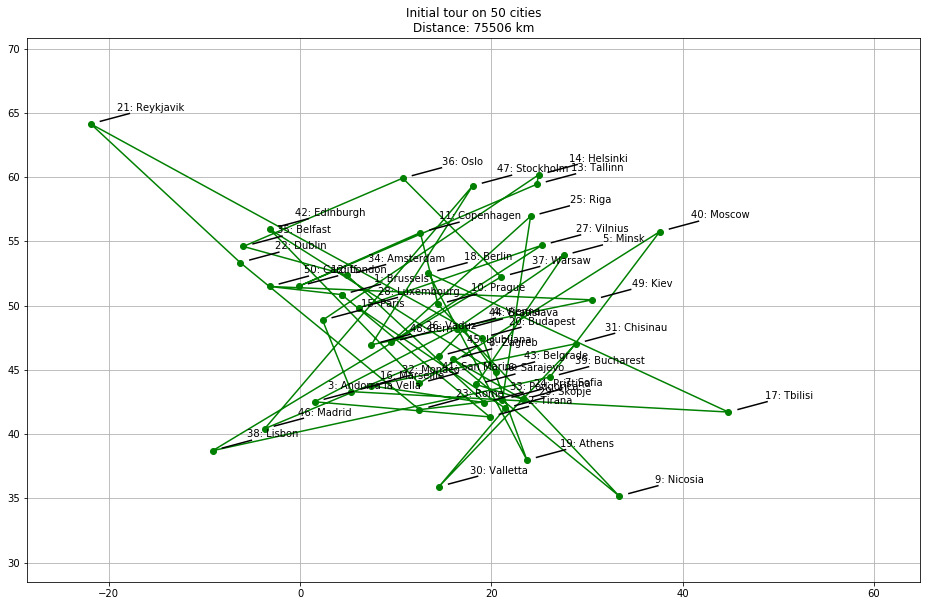

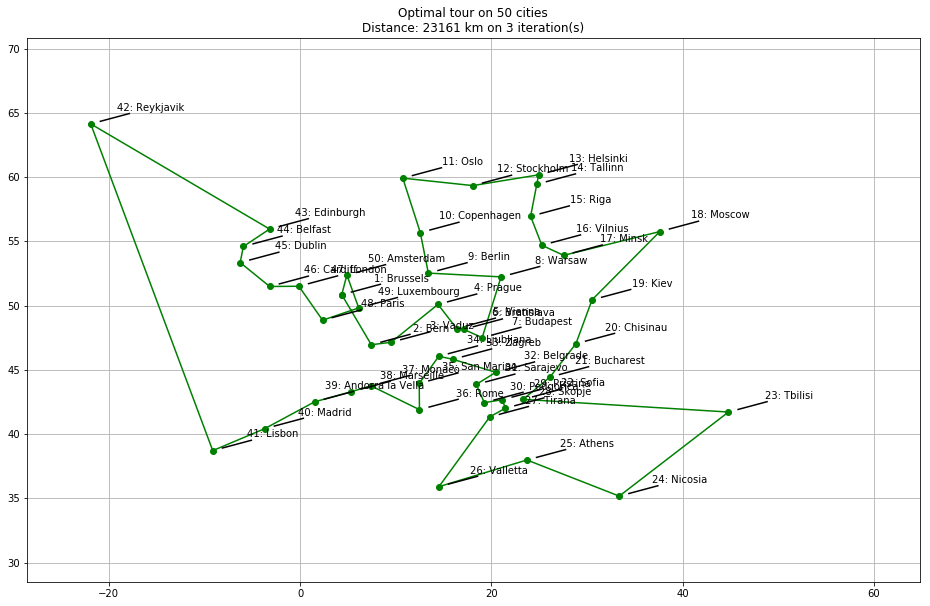

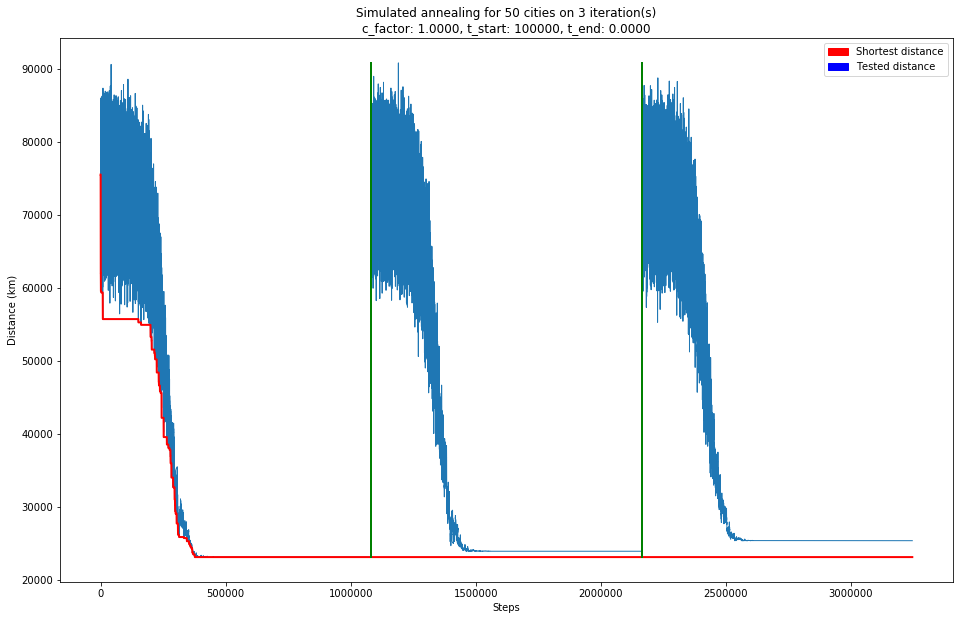

In [63]:
%%time
"""
Simulated annealing with restart applied to the traveling salesman problem.

The data needs to be in cvs format and the coordinates of the cities are
longitude and latitude. Thus, any gps data taken on the internet can
serve as input.

Once the annealing is done, the cities are plotted according to their
coordinates using the matplotlib package. The cities are then linked as to
show the order of visit in the final solution. Also, the evolution of the
tested and shortest distances is plotted.
"""
__docformat__ = "restructuredtext en" 

## Copyright (c) 2010 Emmanuel Goossaert 
##
## This file is free software; you can redistribute it and/or modify
## it under the terms of the GNU General Public License as published by
## the Free Software Foundation; either version 3 of the License, or
## (at your option) any later version.
##
## This file is distributed in the hope that it will be useful,
## but WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
## GNU General Public License for more details.
##
## You should have received a copy of the GNU General Public License
## along with this file.  If not, see <http://www.gnu.org/licenses/>.


import csv
import sys
import math
import random
import time

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline 

distances_pair = []


def read_cities(filename):
    """
    Read city data from a csv file.
    """
    reader = csv.reader(open(filename)) # may raise IOError
    rows = [line for line in reader]
    cities = [City(r[2], index, r[3], float(r[0]), float(r[1])) for index, r in enumerate(rows[1:])]
    return cities


class City:
    """
    Store information regarding a city, including name and gps coordinates.
    """

    def __init__(self, name='', index=0, description='', latitude=0, longitude=0):
        self.name = name
        self.description = description
        self.latitude = latitude
        self.longitude = longitude
        self.index = index

    def __str__(self):
        return '%s %d %s %f %f' % (self.name, self.index, self.description, self.latitude, self.longitude)

    def __repr__(self):
        return self.__str__()

    def compute_distance_to_city_in_km(self, city):
        """Distance to another city using Haversine formula."""
        lat = math.radians(self.latitude - city.latitude)
        long = math.radians(self.longitude - city.longitude)
        a = math.pow(math.sin(lat/2), 2) \
           + math.cos(math.radians(self.latitude)) * math.cos(math.radians(city.latitude)) * pow(math.sin(long/2), 2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        radius_earth = 6378.7 # in kilometers
        return radius_earth * c

    def distance_to_city_in_km(self, city):
        """Distance to another city using pre-computed distance."""
        global distances_pair
        if self.index != city.index:
            indices = [self.index, city.index]
            return distances_pair[max(indices)][min(indices)]
        return 0


def compute_distance_pairs(cities):
    """
    Compute all distance pairs.
    /!\ IMPORTANT: The cities must be ordered by their indices in the list.
    """
    global distances_pair
    for city_from in cities:
        distances_pair.append([0 for r in range(city_from.index)]) # create
        for city_to in cities[:city_from.index]:
            distances_pair[city_from.index][city_to.index] = city_from.compute_distance_to_city_in_km(city_to)
         

def total_distance_in_km(cities):
    distances = [cities[index].distance_to_city_in_km(cities[(index + 1) % len(cities)]) for index in range(len(cities))]
    return sum(distances)


def plot_cities(cities, figure_id):
    """Plot the cities on a plan."""
    plt.figure(figsize=(16,10));
    fig_map = plt.figure(figure_id)
    ax_map = fig_map.add_subplot(111)

    cities_x = [city.longitude for city in cities + [cities[0]]]
    cities_y = [city.latitude for city in cities + [cities[0]]]

    link = '-'
    ax_map.plot(cities_x, cities_y, 'go' + link)
    ax_map.grid()

    spacing = math.fabs(min(cities_x) - max(cities_x)) * .1
    ax_map.set_xlim(min(cities_x) - spacing, max(cities_x) + spacing * 3)
    ax_map.set_ylim(min(cities_y) - spacing, max(cities_y) + spacing)

    for index, city in enumerate(cities):
        ax_map.text(city.longitude,
                    city.latitude,
                    '%d: %s' % (index + 1, city.name),
                    withdash = True,
                    dashdirection = 1,
                    dashlength = 30,
                    rotation = 0,
                    dashrotation = 15,
                    dashpush = 10)
    return ax_map


def plot_distances(distances_current, figure_id, distances_best, ids_iteration, nb_cities, nb_iterations, cooling_factor, temperature_start, temperature_end):
    """Plot the evolution of the distance metrics."""
    # plot distances
    plt.figure(figsize=(16,10));
    fig_distances = plt.figure(figure_id)
    ax_distances = fig_distances.add_subplot(111)
    line_current = ax_distances.plot(distances_current, linewidth=1,label='Tested distance')
    line_best = ax_distances.plot(distances_best, 'r', linewidth=2,label='shortest distance')
    ax_distances.set_title('Simulated annealing for %d cities on %d iteration(s)\nc_factor: %.4f, t_start: %g, t_end: %.4f' % (nb_cities, nb_iterations, cooling_factor, temperature_start, temperature_end))

    # plot iteration steps
    y_min = min(distances_current)
    y_max = max(distances_current)
    line_iteration = None

    for step in ids_iteration[:-1]:
        line_iteration = ax_distances.plot([step, step], [y_min, y_max], 'g', linewidth=2)

    ax_distances.set_xlabel('Steps')
    ax_distances.set_ylabel('Distance (km)')

    index_legend = 3 if len(ids_iteration) > 1 else 2
    red_patch = mpatches.Patch(color='red', label='Shortest distance')
    blue_patch = mpatches.Patch(color='blue', label='Tested distance')
    plt.legend(handles=[red_patch,blue_patch])
    
    #plt.legend( [line_current, line_best, line_iteration],
    #           ['Tested distance', 'Shortest distance', 'Restart'],
     #           loc='upper right' )
   



red_patch = mpatches.Patch(color='red', label='The red data')



def compute_swap_indices(index, nb_cities):
    index_previous = (index - 1 + nb_cities) % nb_cities
    index_next = (index + 1) % nb_cities
    return (index_previous, index_next)


def distance_swap(cities, index_a, index_b):
    """Compute the distance inferred by the two given indices."""
    index_A = min(index_a, index_b)
    index_B = max(index_a, index_b)
    
    (index_A_previous, index_A_next) = compute_swap_indices(index_A, len(cities))
    (index_B_previous, index_B_next) = compute_swap_indices(index_B, len(cities))
  
    distances = []
    # These two distances are common to the two sub-cases
    distances.append(cities[index_A_previous].distance_to_city_in_km(cities[index_A]))
    distances.append(cities[index_B].distance_to_city_in_km(cities[index_B_next]))
    if index_A == index_B_previous:
        # B is following A in the list: the distance between A and B must not
        # be counted twice.
        # ---x---A---B---x---
        distances.append(cities[index_A].distance_to_city_in_km(cities[index_B]))
    else:
        # B is not following A in the list: all distances must be counted
        # ---x---A---x--- ... ---x---B---x---
        distances.append(cities[index_A].distance_to_city_in_km(cities[index_A_next]))
        distances.append(cities[index_B_previous].distance_to_city_in_km(cities[index_B]))

    return sum(distances)


def annealing(cities, temperature_begin=1.0e+300, temperature_end=.1, cooling_factor=.99, nb_iterations=1):
    """
    Simulated annealing function, implemented with acceptance probability from
    by Kirkpatrick et al., and with restart.

    distance_best:    best solution encountered so far
    distance_current: solution used in the current simulation
    distance_new:     solution computed from the random changes to current
    """

    cities_best = cities[:]
    distance_best = total_distance_in_km(cities_best)

    distances_current = []
    distances_best = []
    ids_iteration = []

    try:
        for iteration in range(nb_iterations):
            # the search is restarted at every iteration from
            # the best know solution
            temperature = temperature_begin
            cities_current = cities_best[:]
            distance_current = distance_best
            distance_new = distance_best
            cities_new = cities_best[:]

            step = 0
            while temperature > temperature_end:
                # compute the indices of the two cities to swap by random,
                # but never touch the first city (it does not need to change)
                index = random.sample(range(len(cities_new) - 1), 2)
                index[0] += 1
                index[1] += 1

                # optimize by recomputing only the changed distances
                swap_before = distance_swap(cities_new, index[0], index[1])
                cities_new[index[0]], cities_new[index[1]] = cities_new[index[1]], cities_new[index[0]]
                swap_after = distance_swap(cities_new, index[0], index[1])

                # compute the new distance
                # recomputing all is bad: distance_new = total_distance_in_km(cities_new)
                distance_new = distance_new - swap_before + swap_after

                # acceptance probability by Kirkpatrick et al.
                diff = distance_new - distance_current
                if diff < 0 or  math.exp( -diff / temperature ) > random.random():
                    cities_current = cities_new[:]
                    distance_current = distance_new
                else:
                    # reset cities and distance
                    distance_new = distance_current
                    cities_new = cities_current[:]

                # update the best if current solution is better
                # not part of the annealing itself, just used for the restart
                if distance_current < distance_best:
                    cities_best = cities_current[:]
                    distance_best = distance_current

                if True:
                    # if step % 100 == 0:
                    # uncomment to enable systematic sampling: 1 point every 100th
                    distances_current.append(distance_current)
                    distances_best.append(distance_best)
                temperature = temperature * cooling_factor
                step = step + 1

            ids_iteration.append(len(distances_current))

    except KeyboardInterrupt as e:
        print ("Interrupted on user demand.")
        print ('performed iterations: %d' % iteration )

    return cities_best, distances_current, distances_best, ids_iteration


def display_usage():
    print ('usage: %s input [plot] [nb_ite] [nb_cities] [c_factor] [t_start] [t_end] [r_seed]' % sys.argv[0])
    print ('  input: input CSV file containing the city coordinates')
    print ('  output: \'plot\' to display figures to screen, \'file\' to save')
    print ('          figures to files (default: \'plot\')')
    print ('  nb_ite: number of iterations in the restart process (default: 1)')
    print ('  nb_cities: number of cities read from the input file (n first lines,')
    print ('             default: all cities in file)')
    print ('  c_factor: cooling factor, float number in (0,1) (default: .95)')
    print ('  t_start: initial temperature (default: 1.0e+50, maximum: 1.0e+300)')
    print ('  t_end: temperature at which the process will be stopped (default: .1)')
    print ('         must be smaller than t_start')
    print ('  r_seed: seed for the random number generator (default: standard')
    print ('          \'library\'s default)')


if __name__ == '__main__':

    if len(sys.argv) < 2:
        display_usage()
        sys.exit(0)

    input             = sys.argv[1]
    input = './cities.csv'
    plot              = sys.argv[2]        if len(sys.argv) > 2 else 'plot'
    nb_iterations     = int(sys.argv[3])   if len(sys.argv) > 3 else 3
    nb_cities         = int(sys.argv[4])   if len(sys.argv) > 4 else -1
    cooling_factor    = float(sys.argv[5]) if len(sys.argv) > 5 else .99998
    temperature_start = float(sys.argv[6]) if len(sys.argv) > 6 else 1.0e+5
    temperature_end   = float(sys.argv[7]) if len(sys.argv) > 7 else .00004
    random_seed       = float(sys.argv[8]) if len(sys.argv) > 8 else -1
    
    if random_seed == -1:
        random.seed() 
    else:
        random.seed(random_seed)

    time_begin = time.time()
    cities = read_cities(input)
    compute_distance_pairs(cities)

    nb_cities = len(cities) if nb_cities <= 0 else nb_cities

    print ('Starting simulated annealing, type CTRL+C to interrupt...')

    cities = cities[:nb_cities]
    (cities_new, distances_current, distances_best, ids_iteration) = annealing(cities, temperature_start, temperature_end, cooling_factor, nb_iterations)
    time_end = time.time()

    distance_begin = total_distance_in_km(cities)
    distance_end = total_distance_in_km(cities_new)
    print ('Improvement:          %8.0f %%'  % (100 * (distance_begin - distance_end) / distance_begin))
    print ('Time:                 %8.0f sec' % (time_end - time_begin))
    print ('Initial distance:     %8.0f km'  % distance_begin)
    print ('Optimal distance:     %8.0f km'  % distance_end)

    ax_map = plot_cities(cities, 1)
    ax_map.set_title('Initial tour on %d cities\nDistance: %.0f km' % (len(cities), distance_begin))

    if nb_iterations:
        ax_map = plot_cities(cities_new, 2)
        ax_map.set_title('Optimal tour on %d cities\nDistance: %.0f km on %d iteration(s)' % (len(cities), distance_end, nb_iterations))
        plot_distances(distances_current, 3, distances_best, ids_iteration, len(cities), nb_iterations, cooling_factor, temperature_start, temperature_end)

    if plot == 'plot':
        plt.show()
    else:
        # save in files
        format = 'png'

        parameters = { 'nb_cities': len(cities),
                       'nb_ite': nb_iterations,
                       'c_factor': cooling_factor,
                       't_start': temperature_start,
                       't_end': temperature_end,
                       'format': format
                      }
        
        plt.figure(1)
        #plt.savefig('tsp_cities_c%(nb_cities)d_init_f%(c_factor).4f_s%(t_start)g_e%(t_end).4f.%(format)s' % parameters, format=format)
        plt.figure(2)
        #plt.savefig('tsp_cities_c%(nb_cities)d_i%(nb_ite)d_f%(c_factor).4f_s%(t_start)g_e%(t_end).4f.%(format)s' % parameters, format=format)
        plt.figure(3)
        #plt.savefig('tsp_distances_c%(nb_cities)d_i%(nb_ite)d_f%(c_factor).4f_s%(t_start)g_e%(t_end).4f.%(format)s' % parameters, format=format)


In [42]:
reader = csv.reader(open('cities.csv')) # may raise IOError
reader.line_num
print([line for line in reader])
#print([line for line in reader])

[['latitude', 'longitude', 'name', 'desc', 'color'], ['50.8462807', '4.3547273', 'Brussels', 'Brussels, Belgium', ''], ['41.33165', '19.8318', 'Tirana', 'Tirana, Albania', ''], ['42.5075025', '1.5218033', 'Andorra la Vella', 'Andorra la Vella, Andorra', ''], ['48.2092062', '16.3727778', 'Vienna', 'Vienna, Austria', ''], ['53.905117', '27.5611845', 'Minsk', 'Minsk, Belarus', ''], ['43.85643', '18.41342', 'Sarajevo', 'Sarajevo, Bosnia and Herzegovina', ''], ['42.6976246', '23.3222924', 'Sofia', 'Sofia, Bulgaria', ''], ['45.8150053', '15.9785014', 'Zagreb', 'City of Zagreb, Croatia', ''], ['35.167604', '33.373621', 'Nicosia', 'Nicosia, Cyprus', ''], ['50.0878114', '14.4204598', 'Prague', 'Prague, Czech Republic', ''], ['55.6762944', '12.5681157', 'Copenhagen', 'Copenhagen, Denmark', ''], ['51.5001524', '-0.1262362', 'London', 'Westminster, London, UK', ''], ['59.4388619', '24.7544715', 'Tallinn', 'Tallinn, Estonia', ''], ['60.1698791', '24.9384078', 'Helsinki', 'Helsinki, Finland', ''], [

In [38]:
reader.line_num

0